### 딥러닝이란 
 - 2000년대부터 사용되고 있는 심층 신경망의 또 다른 이름
 - machine Learning methods beased on artifial neural networks
 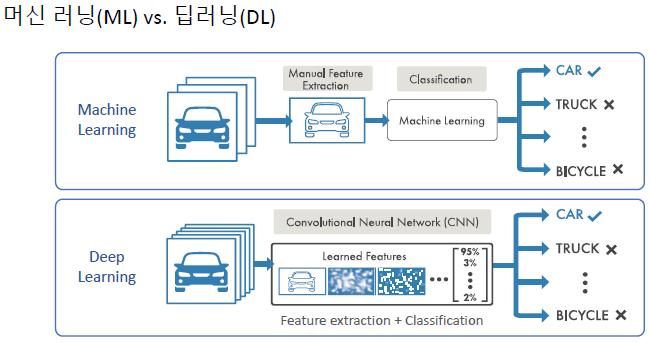
 
#### 활용 
 - Image Recognition
 - object Detection
 - object Segmentation
 - super-resolution
 - Image to Image Translation
 - Image Inpainting
 - voice recog, 
 - chat bot 
 
#### perceptron 
 - v= activate(wx + b)

### CNN: Convolutional Neural Network
 - 영상 인식등을 위한 딥러닝에 특화된 네트워크 구조 (convolution+pooling+FC) 

#### convolution layer
 - 2차원 영상에서 유효한 특징(feature)을 찾아내는 역할
 - 유용한 filter mask가 학습에 의해 결정됨 
 - 보통 ReLu 활성화 함수와 함께 사용 
 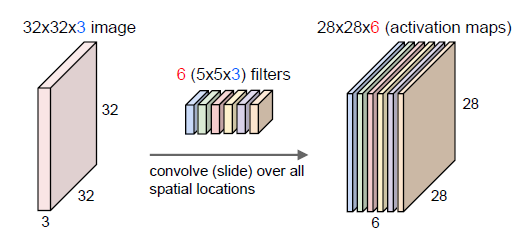
 
#### Pooling layer
 - 유용한 정보를 유지하며 입력 크기를 줄여 과적합을 예방하고 계산량 감소
 - maxpooling or average pooling 
 
#### Fully Connected layer
 - softmax로 각 클래스에 대한 확률 값을 결과로 얻음
 
#### 종류
 - lenet5 (필기체 인식)
 - Alexnet ('2012 ILSVRC 1위, top-5 : 15.4%)
 - VGG16 ('2014 ILSVRC 2위, top-5 : 7.3%)
 - googleNet ('2014 ILSVRC 1위, top-5 : 6.7%(사람 5.1%))



In [1]:
!pip list

Package                      Version
---------------------------- -------------------
absl-py                      1.0.0
altair                       4.2.0
altgraph                     0.17.2
anyio                        3.3.2
APScheduler                  3.6.3
argon2-cffi                  21.1.0
astor                        0.8.1
astunparse                   1.6.3
asyncio                      3.4.3
attrs                        21.2.0
Babel                        2.9.1
backcall                     0.2.0
base58                       2.1.1
bcrypt                       3.2.2
bleach                       4.1.0
blinker                      1.4
cachetools                   4.2.2
certifi                      2021.5.30
cffi                         1.14.6
charset-normalizer           2.0.6
click                        7.1.2
colorama                     0.4.4
cryptography                 37.0.2
cycler                       0.11.0
debugpy                      1.4.3
decorator                    5.

You should consider upgrading via the 'c:\users\user\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [2]:
'''
tf 1.xx version example
'''
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
from tensorflow.python.framework import graph_util
from tensorflow.python.platform import gfile

tf.logging.set_verbosity(tf.logging.ERROR)

mnist = input_data.read_data_sets('./MNIST_data/', one_hot=True)

#
# hyper parameters
#
learning_rate = 0.001
training_epochs = 20
batch_size = 100

#
# Model configuration
#
X = tf.placeholder(tf.float32, [None, 28, 28, 1], name='data')
Y = tf.placeholder(tf.float32, [None, 10])

conv1 = tf.layers.conv2d(X, 10, [3, 3], padding='same', activation=tf.nn.relu)
pool1 = tf.layers.max_pooling2d(conv1, [2, 2], strides=2, padding='same')

conv2 = tf.layers.conv2d(pool1, 20, [3, 3], padding='same', activation=tf.nn.relu)
pool2 = tf.layers.max_pooling2d(conv2, [2, 2], strides=2, padding='same')

fc1 = tf.contrib.layers.flatten(pool2)
fc2 = tf.layers.dense(fc1, 200, activation=tf.nn.relu)
logits = tf.layers.dense(fc2, 10, activation=None)
output = tf.nn.softmax(logits, name='prob')

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=Y, logits=logits))
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cost)

#
# Training
#
sess = tf.Session()
sess.run(tf.global_variables_initializer())
total_batch = int(mnist.train.num_examples / batch_size)

print('Start learning!')
for epoch in range(training_epochs):
    total_cost = 0

    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        batch_xs = batch_xs.reshape(-1, 28, 28, 1)
        _, cost_val = sess.run([optimizer, cost], feed_dict={X: batch_xs, Y: batch_ys})
        total_cost += cost_val

    print('Epoch: {0}, Avg. Cost = {1:.4f}'.format(epoch + 1, total_cost/total_batch))

print('Learning finished!')

# Test the results
is_correct = tf.equal(tf.argmax(logits, 1), tf.argmax(Y, 1))
acc = tf.reduce_mean(tf.cast(is_correct, tf.float32))
accuracy = sess.run(acc, feed_dict={
                    X: mnist.test.images.reshape(-1, 28, 28, 1), Y: mnist.test.labels})
print('Test Accuracy:', accuracy)

# Freeze variables and save pb file
output_graph_def = graph_util.convert_variables_to_constants(sess, sess.graph_def, ['prob'])
with gfile.FastGFile('./mnist_cnn.pb', 'wb') as f:
    f.write(output_graph_def.SerializeToString())

print('mnist_cnn.pb file is created successfully!!')


ModuleNotFoundError: No module named 'tensorflow.examples'

**``` cv2.dnn.readNet(model,config=None, framework=None) -> retval```**
 - model : 훈련된 가중치를 저장하고 있는 이진파일 이름
 - config : 네트우커 구성을 저장하고 있는 텍스트파일 이름
 - framework : 명시적인 딥러닝 프레임워크 이름
 - retval : cv2.dnn_Net 클래스 
 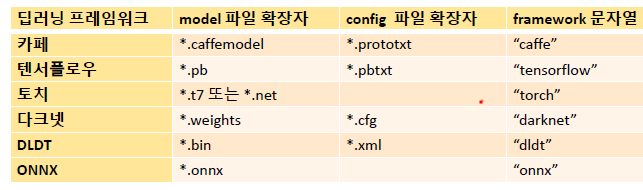
 |프레임워크|model|config|framework|
 |:--|:--|:--|:--|
 |까페||||
 
**``` cv2.dnn.blobFromImage(image,scalefactor=None,size=None,mean=None,swapRB=None,crop=None,ddepth=None) -> retval```**
 - image: 입력영상
 - scalefactor : 입력 영상픽셀값에 곱할 값 (기본 1) 
 - size: 출력 영상의 크기 (기본(0,0))
 - mean : 입력 영상 각 채널에서 뺄 평균 (기본(0,0,0,0))
 - swapRB: R과 B 채널을 바꿀 것인가 (기본 false) 
 - crop : crop수행 여부 (기본false) 
 - ddepth : 출력 블롭 깊이. CV_32F가 기본값
 - retval : 영상으로 부터 구한 blob 객체. np.ndarray. shape=(N,C,H,W) float32
 
**``` cv2.dnn_Net.setInput(blob,name=None, scalefactor=None, mean=None)-> None```**
 - blob : blob객체 
 - name :입력 레이어 이름
 - scalefactor/mean : 추가적으로 픽셀에 곱할 값 / 뺄 평균값
 
**``` cv2.dnn_Net.forward(outputName=None) -> retval```**

**```cv2.dnn_Net.forward(outputNames=None,outputBlobs=None) -> outputBlobs```**
  - outputNAme : 출력 레이어 이름
  - retval : 지정한 레이어의 풀력 블롭. 네트워크마다 다름
  - outputNames: 출력 레이어 이름 리스트
  - outputBlobs: 지정한 레이어의 출력 블롭 리스트

In [4]:
'''
dnnmnist1.py
'''
import sys
import numpy as np
import cv2


oldx, oldy = -1, -1


def on_mouse(event, x, y, flags, _):
    global oldx, oldy

    if event == cv2.EVENT_LBUTTONDOWN:
        oldx, oldy = x, y

    elif event == cv2.EVENT_LBUTTONUP:
        oldx, oldy = -1, -1

    elif event == cv2.EVENT_MOUSEMOVE:
        if flags & cv2.EVENT_FLAG_LBUTTON:
            cv2.line(img, (oldx, oldy), (x, y), (255, 255, 255), 40, cv2.LINE_AA)
            oldx, oldy = x, y
            cv2.imshow('img', img)


net = cv2.dnn.readNet('.\\ch12\\mnist_cnn.pb')

if net.empty():
    print('Network load failed!')
    sys.exit()

img = np.zeros((400, 400), np.uint8)

cv2.imshow('img', img)
cv2.setMouseCallback('img', on_mouse)

while True:
    c = cv2.waitKey()

    if c == 27:
        break
    elif c == ord(' '):
        blob = cv2.dnn.blobFromImage(img, 1/255., (28, 28))
        net.setInput(blob)
        prob = net.forward()

        _, maxVal, _, maxLoc = cv2.minMaxLoc(prob)
        digit = maxLoc[0]

        print(f'{digit} ({maxVal * 100:4.2f}%)')

        img.fill(0)
        cv2.imshow('img', img)

cv2.destroyAllWindows()


KeyboardInterrupt: 

In [3]:
'''
dnnmnist2.py
 - 정규화 코드 추가
'''
import sys
import numpy as np
import cv2


oldx, oldy = -1, -1


def on_mouse(event, x, y, flags, _):
    global oldx, oldy

    if event == cv2.EVENT_LBUTTONDOWN:
        oldx, oldy = x, y

    elif event == cv2.EVENT_LBUTTONUP:
        oldx, oldy = -1, -1

    elif event == cv2.EVENT_MOUSEMOVE:
        if flags & cv2.EVENT_FLAG_LBUTTON:
            cv2.line(img, (oldx, oldy), (x, y), (255, 255, 255), 20, cv2.LINE_AA)
            oldx, oldy = x, y
            cv2.imshow('img', img)


def norm_digit(img):
    m = cv2.moments(img)
    cx = m['m10'] / m['m00']
    cy = m['m01'] / m['m00']
    h, w = img.shape[:2]
    aff = np.array([[1, 0, w/2 - cx], [0, 1, h/2 - cy]], dtype=np.float32)
    dst = cv2.warpAffine(img, aff, (0, 0))
    return dst


net = cv2.dnn.readNet('.\\ch12\\mnist_cnn.pb')

if net.empty():
    print('Network load failed!')
    sys.exit()

img = np.zeros((800, 800), np.uint8)

cv2.imshow('img', img)
cv2.setMouseCallback('img', on_mouse)

while True:
    c = cv2.waitKey()

    if c == 27:
        break
    elif c == ord(' '):
        blob = cv2.dnn.blobFromImage(norm_digit(img), 1/255., (28, 28))
        net.setInput(blob)
        prob = net.forward()

        _, maxVal, _, maxLoc = cv2.minMaxLoc(prob)
        digit = maxLoc[0]

        print(f'{digit} ({maxVal * 100:4.2f}%)')

        img.fill(0)
        cv2.imshow('img', img)

cv2.destroyAllWindows()


1 (50.88%)


ZeroDivisionError: float division by zero

### googleNet


In [20]:
import sys
import numpy as np
import cv2


# 입력 영상 불러오기

filename = '.\\ch12\\space_shuttle.jpg'
filename = '.\\ch12\\beagle.jpg'
filename = '.\\ch12\\cup.jpg'
filename = '.\\ch12\\pineapple.jpg'
filename = '.\\ch12\\scooter.jpg'

# if len(sys.argv) > 1:
#     filename = sys.argv[1]

img = cv2.imread(filename)

if img is None:
    print('Image load failed!')
    sys.exit()

# 네트워크 불러오기

# # Caffe
# model = '.\\ch12\\googlenet\\bvlc_googlenet.caffemodel'
# config = '.\\ch12\\googlenet\\deploy.prototxt'

#ONNX
model = '.\\ch12\\googlenet\\googlenet-12-int8.onnx'
config = ''

net = cv2.dnn.readNet(model, config)

if net.empty():
    print('Network load failed!')
    sys.exit()

# 클래스 이름 불러오기

classNames = None
with open('.\\ch12\\googlenet\\classification_classes_ILSVRC2012.txt', 'rt') as f:
    classNames = f.read().rstrip('\n').split('\n')

# 추론

blob = cv2.dnn.blobFromImage(img, 1, (224, 224), (104, 117, 123))
net.setInput(blob)
prob = net.forward()

# 추론 결과 확인 & 화면 출력

out = prob.flatten()
classId = np.argmax(out)
confidence = out[classId]

text = f'{classNames[classId]} ({confidence * 100:4.2f}%)'
cv2.putText(img, text, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 0, 255), 1, cv2.LINE_AA)

cv2.imshow('img', img)
cv2.waitKey()
cv2.destroyAllWindows()


[실전코딩] 한글 손글씨 인식